# Dolsek and Fajfar

The aim of this procedure is the estimation of the median spectral acceleration value that brings the structure to the attainment of a set of damage states ds, and the corresponding dispersion. The aim is achieved making use of the work by Dolsek and Fajfar (2004) to estimate the inelastic displacement of a SDOF system based on its elastic displacement and the R-mu-T relationship proposed. Record-to-record dispersion from Ruiz-García and Miranda (2007) can be icluded in the derivation of fragility curves.

<img src="../../../../../figures/DF_r_mu_T.jpg" height="150" width="400" align="middle">

##Load capacity curves

In order to use this methodology, it is necessary to provide one (or a group) of pushover curves, defined according to the format established on the [RMTK manual](../../../../../rmtk-docs.pdf). The user needs to provide the following information:
- The location of the folder containing the pushover curves using the parameter capacity_curves_file.
- The type of information provided in the input using the parameter input_type. The user can provide either base shear and top displacement or base shear and displacement of each storey.
- A spectral shape in case multiple pushover curves are input.

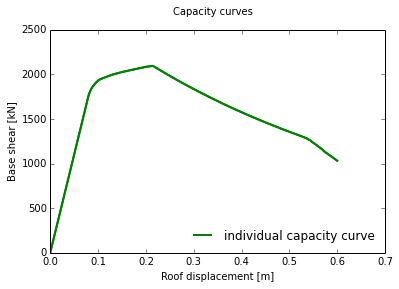

In [1]:
from rmtk.vulnerability.common import utils
%matplotlib inline 

capacity_curves_file = '../../../../../../rmtk_data/capacity_curves_Vb-droof.csv'
input_type = 'Vb-dfloor'
input_spectrum = '../../../../../../rmtk_data/FEMAP965spectrum.txt'

capacity_curves = utils.read_capacity_curves(capacity_curves_file)
utils.plot_capacity_curves(capacity_curves)
Sa_ratios = utils.get_spectral_ratios(capacity_curves,input_spectrum)

##Idealise pushover curves

In order to use this methodology the pushover curves needs to be idealised. Please choose an idealised shape (either bilinear or quadrilinear) using the parameter idealised_type. Idealised curves can be directly provided as input setting the field 'Idealised' to TRUE in the input_file.

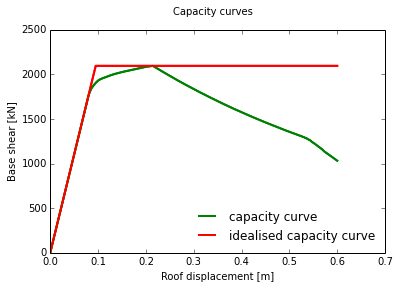

In [2]:
idealised_type = 'bilinear'

idealised_capacity = utils.idealisation(idealised_type, capacity_curves)
utils.plot_idealised_capacity(idealised_capacity, capacity_curves, idealised_type)

##Load damage state thresholds

Please define in the variable damage_state_file the path to your damage model.

In [3]:
damage_model_file = '../../../../../../rmtk_data/damage_model_ISD.csv'
damage_model = utils.read_damage_model(damage_model_file)
print damage_model

{'dispersion': [[0.05, 0.05, 0.05, 0.05], [0.05, 0.05, 0.05, 0.05]], 'type_criteria': 'interstorey drift', 'distribution': ['normal', 'normal', 'normal', 'normal'], 'median': [[0.005, 0.01, 0.02, 0.05], [0.005, 0.01, 0.02, 0.05]], 'damage_states': ['Slight', 'Moderate', 'Extensive', 'Collapse']}


##Calculate fragility functions

The record-to-record and the damage threshold dispersions are calculated and integrated making use of monte carlo simulations. Please enter the number of monte carlo simulations that want to be performed in the variables montecarlo_samples. Please also define the constant acceleration-constant velocity and constant velocity-constant displacement corner periods of a Newmark-Hall type spectrum within the variables corner_periods.

In [4]:
from rmtk.vulnerability.derivation_fragility.R_mu_T_no_dispersion.dolsek_fajfar import DF2004 

montecarlo_samples = 25
corner_periods = [0.5, 1.8]

fragility_model = DF2004.calculate_fragility(capacity_curves, idealised_capacity, damage_model, montecarlo_samples, Sa_ratios, corner_periods)

ac<0.02, it must be in [0.02,4], changed to ac = 0.02
mu(LS) =  [ 1.62898916  3.25797831  6.30729041  6.30729041]
medians= [ 0.1901851   0.38928813  0.75923524  0.75923524]
total dispersion= [ 0.21014769  0.3564222   0.3970612   0.39697751]


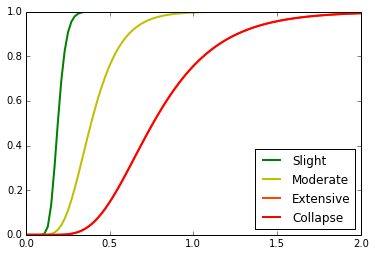

In [5]:
output_type = 'logmean-cov'
#'median-dispersion' #'logmean-cov' #'mean-sigma'
save = 1

utils.plot_fragility_model(fragility_model,0.01,2,save)
utils.create_fragility_out_files(fragility_model,output_type,save)